*This notebook, `summary.ipynb`, contains analysis of the open-coding processes itself. It depends upon CSV files generated by `notebook-search.ipynb`.*

# Import data and modules

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import re
from lib.util import getCodes, displayMarkdown

%autosave 0

alt.renderers.enable('notebook')

Autosave disabled


RendererRegistry.enable('notebook')

## Import codes

The cell below recursively searches the `notebooks/` directory for files with a `.html.pdf` extension. These are PDF printouts of computational notebooks and scripts that I coded using the comments feature in [Adobe Acrobat DC](https://acrobat.adobe.com/ca/en/acrobat.html). This notebook needs to import all codes from the open coding process.

In [2]:
%%time
codes = getCodes()

CPU times: user 56 s, sys: 160 ms, total: 56.2 s
Wall time: 56.7 s


## Import metadata on analyzed notebooks

The cell below parses the works-cited section of the `README.md` document with regular expressions. A demo of this regular expression can be found on [regexr.com](https://regexr.com/4htcn). This section contains a citation for every notebook included in this analysis. Some of the URLs from the works cited list are cleaned so that the path matches the path in this repository under `notebooks/`.

In [3]:
regxp = r'\n([^\n\.\#]+)\.\s\((\d{4}),\s(\w+)\s(\d+)\)\.\s([^\.]+\.)\s\*([^\*]+)\*\.\sRetrieved from https:\/\/(?:[^\/]+\/){2}(.*)\n'
with open('README.md') as readme:
    content = readme.read()

citations = re.findall(regxp,content)
citations = pd.DataFrame(citations, columns=['journalist', 'year', 'month', 'date', 'analysis', 'organization', 'path'])

citations.replace(to_replace=r'data/tree/master/|data-projects/tree/master/|2016/05/|st-methods/tree/master/', 
                  value='', 
                  regex=True, 
                  inplace=True)

citations.head()

,journalist,year,month,date,analysis,organization,path
0,"Aisch, Gregor; Keller, Josh; Eddelbuettel, Dirk",2016,June,13,Analysis of NICS gun purchase background checks.,New YorkTimes,gunsales
1,"Aldhous, Peter",2016,September,16,"""Shy Trumpers"" polling analysis.",BuzzFeed News,2016-09-shy-trumpers
2,"Arthur, Rob",2015,July,30,Buster Posey MVP.,FiveThirtyEight,buster-posey-mvp
3,"Bi, Frank",2016,Jan,13,Uber launch cities and date.,Vox,verge-uber-launch-dates
4,"Bradshaw, Paul",2019,April,6,Lack of electric car charging points 'putting ...,BBC,electric-car-charging-points


## Import repos and contributors

The file `notebook-search.ipynb` mines GitHub for repos containing data-journalism workflows and exports this data to `data/repos.csv` and `data/contributors.csv`.

In [4]:
# Get all repos
repos = pd.read_csv('data/repos.csv')

# Subset repos to only those that contained data analysis
keepers = repos[repos.is_keeper == True]

# Get contributors, which is really contributors to keeper notebooks
contributors = pd.read_csv('data/contributors.csv')

# Analysis Stats

In [5]:
byTheNumbers = citations.loc[:,['journalist', 'organization', 'analysis']].describe().loc['unique',:].to_frame('count')
byTheNumbers = byTheNumbers.append(pd.DataFrame({
        'count': [ codes.code.nunique(), 
                   repos.shape[0],
                   keepers.shape[0],
                   keepers.org.nunique(),
                 ],
    }, index=['codes', 'repos', 'relevant repos', 'total organizations']))

byTheNumbers

,count
journalist,33
organization,26
analysis,50
codes,139
repos,181
relevant repos,180
total organizations,38


# Establishing convergence
TK

## Notebook coding order

The works cited page of analyzed computational notebooks serves as a list of coded notebooks, but it doesn't preserve the order in which they were coded. The `reposIncluded` list has lists each repo in reverse chronological order.

In [6]:
pathsIncluded = [
    'demolitions',
    'gunsales',
    'us-weather-history',
    'california-buildings-in-severe-fire-hazard-zones',
    'swana-population-map',
    '1805-regionen im fokus des US-praesidenten',
    'school-choice',
    '201901-achievementgap',
    'general-election-2015-classification-tree',
    '201901-hospitalquality',
    'awb-notebook',
    'skatemusic',
    'new-york-schools-assessment',
    'lending-club',
    'auditData',
    '2019-ems-analysis',
    'federal_employees_trump_2017', 
    'infrastructure-jobs',
    'librarians',
    'midwife-led-units',
    'internal-migration-london',
    'electric-car-charging-points',
    'school-star-ratings-2018',
    'prison-admissions',
    'vox-central-line-infections',
    'verge-uber-launch-dates',
    'buster-posey-mvp',
    'work-from-home',
    'nyc-trips',
    'bob-ross',
    'bechdel',
    'employment-discrimination',
    '2015-11-refugees-in-the-united-states',
    'babyname_politics',
    'wikipedia-rankings',
    'Power_of_Irma',
    'Endangered-Species-Act-Louisiana',
    'california-h2a-visas-analysis',
    '2016-04-republican-donor-movements',
    'the-cube-root-law',
    '2016-09-shy-trumpers',
    '2018-05-31-crime-and-heat-analysis',
    '2016-11-bellwether-counties',
    'heat-index',
    '2018-voter-registration',
    'long-term-care-db',
    'census-hard-to-map-analysis',
    'california-crop-production-wages-analysis',
    'california-ccscore-analysis',
    '2019-04-democratic-candidate-codonors',
]

codingOrder = pd.DataFrame({'analysis': pathsIncluded[::-1] }).reset_index().rename(columns={'index': 'coding order'})

### Sanity check

Make sure that I've manually added all the repos to `reposIncluded` that are listed in `README.md`.

In [7]:
citMinusPath = set(citations.path.unique()).difference(set(pathsIncluded))
pathMinusCit = set(pathsIncluded).difference(set(citations.path.unique()))

if len(citMinusPath) > 0:
    displayMarkdown('In `citations` but not in `pathsIncluded`: {}'.format(', '.join(list(citMinusPath))))
else:
    displayMarkdown('All paths in `citations` are also in `pathsIncluded`\n')

if len(pathMinusCit) > 0:
    displayMarkdown('In `pathsIncluded` but not in `citations`: {}'.format(', '.join(list(pathMinusCit))))
else:
    displayMarkdown('All paths in `pathsIncluded` are also in `citations`\n')

All paths in `citations` are also in `pathsIncluded`


All paths in `pathsIncluded` are also in `citations`


## Visualizing code set growth

In order to visualize the cardinality of the code set per notebook coded, the `codes` data frame needs to be grouped by article.

In [8]:
codesByArticle = codes.groupby(['analysis']).code \
    .unique() \
    .to_frame('codes') \
    .reset_index() \
    .merge(codingOrder, on='analysis') \
    .sort_values('coding order') \
    .reset_index()

codesByArticle['cumulative count'] = 0

codeset = set()
for i, row in codesByArticle.iterrows():
    setDiff = set(row.codes).difference(codeset)
    codeset = codeset.union(setDiff)
    codesByArticle.loc[i, 'cumulative count'] = len(codeset)
    codesByArticle.loc[i, 'new codes'] = ', '.join(setDiff)

codesByArticle.head()

,index,analysis,codes,coding order,cumulative count,new codes
0,7,2019-04-democratic-candidate-codonors,"[use open government data, load, architect a s...",0,27,"load, outer join tables, repetitive code, use ..."
1,20,california-ccscore-analysis,"[format table display, load, subset columns, c...",1,40,"count number of rows, change column data type,..."
2,21,california-crop-production-wages-analysis,"[use open government data, format table displa...",2,47,"answer a question, inner join tables, construc..."
3,23,census-hard-to-map-analysis,"[wrangle data for graphics, use open governmen...",3,49,"slice column values, tolerate dirty data"
4,35,long-term-care-db,"[count value frequency, figure a rate, use non...",4,59,"fix data errors manually, refine table, scrape..."


Plot the size of the code set as more computational notebooks are analyzed.

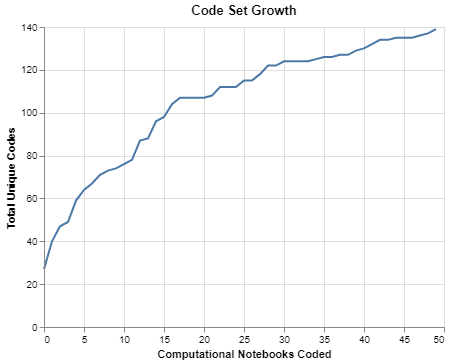

In [9]:
alt.Chart(data = codesByArticle, title = 'Code Set Growth') \
    .mark_line() \
    .encode(
        x = alt.X('coding order:Q', title="Computational Notebooks Coded"),
        y = alt.Y('cumulative count:Q', title="Total Unique Codes")
    )

For each notebook included in analysis list which codes were introduced to the code set. After 23 notebooks, some computational notebooks didn't add any new codes.

In [10]:
for i, row in codesByArticle.iterrows():
    displayMarkdown('{}. **{}**: {}'.format(i + 1, row.analysis, row['new codes']))

1. **2019-04-democratic-candidate-codonors**: load, outer join tables, repetitive code, use open government data, group by multiple columns, count value frequency, union tables, deduplicate, remove value characters, sort table, peek at data, export, figure a rate, subset columns, canonicalize column names, compare different groups along a common metric, create soft key, strip whitespace, sum along dimension, architect a subroutine, annotate workflow, group by single column, trim by contains value, gather table, count unique values in column, format values, self join table

2. **california-ccscore-analysis**: count number of rows, change column data type, calculate spread, visualize data, trim by quantitative threshold, trim by date range, inspect table schema, standardize values, calculate change over time, calculate central tendency, format table display, split, compute, and merge, cross tabulate

3. **california-crop-production-wages-analysis**: answer a question, inner join tables, construct table manually, wrangle data for graphics, trim by geographic area, adjust for inflation, architect repeating process

4. **census-hard-to-map-analysis**: slice column values, tolerate dirty data

5. **long-term-care-db**: fix data errors manually, refine table, scrape web for data, combine entities, aggregate the forest from the trees, use non-public, provided data, remove erroneous data, encode table identification in row, use lookup table, fill in na values after an outer join

6. **2018-voter-registration**: rolling window calculation, combine drifting datasets, calculate a statistic, show trend over time, pull tables out of pdf

7. **heat-index**: cartesian product, generate data computationally, compute index number

8. **2016-11-bellwether-counties**: spread table, get extreme values, use academic data, remove incomplete data

9. **2018-05-31-crime-and-heat-analysis**: combine seemingly disparate datasets, extract property from datetime

10. **2016-09-shy-trumpers**: use another news orgs data

11. **the-cube-root-law**: domain-specific performance metric, use public data

12. **2016-04-republican-donor-movements**: explore dynamic network flow, split column on delimiter

13. **california-h2a-visas-analysis**: replace na values, create a unique key, preserve existing values, concatenate columns into key, geocode addresses, split and compute, resolve entities, temporary joining column, create child table

14. **Endangered-Species-Act-Louisiana**: scale values

15. **Power_of_Irma**: value replacement, outlier detection, toggle step on and off, fix incorrect calculation, set data confidence threshold, interpret statistical/ml model, use data from colleague, use previously cleaned data

16. **wikipedia-rankings**: collect raw data, explain variance

17. **babyname_politics**: resort after merge, data loss from aggregation, join aggregate, check results of previous operation, get unique values, assign ranks

18. **2015-11-refugees-in-the-united-states**: make an incorrect conclusion, test for equality, designate column as primary key

19. **employment-discrimination**: 

20. **bechdel**: 

21. **bob-ross**: 

22. **nyc-trips**: full join tables

23. **work-from-home**: translate entity names manually, create flag, data too large for repo, copy table schema

24. **buster-posey-mvp**: 

25. **verge-uber-launch-dates**: 

26. **vox-central-line-infections**: correct bad formatting, report rows with column number discrepancies, sort table rows

27. **prison-admissions**: 

28. **school-star-ratings-2018**: pad column values, display rows with missing values, combine data and geography

29. **electric-car-charging-points**: encode redundant information, define edge weights, find nearest neighbours in the network, create edge

30. **internal-migration-london**: 

31. **midwife-led-units**: freedom of information data, test different computations for equality

32. **librarians**: 

33. **infrastructure-jobs**: 

34. **federal_employees_trump_2017**: 

35. **2019-ems-analysis**: rollup

36. **auditData**: combine columns

37. **lending-club**: 

38. **new-york-schools-assessment**: backfill missing data

39. **skatemusic**: 

40. **awb-notebook**: silently dropping values after groupby, describe statistically

41. **201901-hospitalquality**: fix mixed data types

42. **general-election-2015-classification-tree**: wrangle data for model, check for nas

43. **201901-achievementgap**: query database, bin values

44. **school-choice**: 

45. **1805-regionen im fokus des US-praesidenten**: concat parallel tables

46. **swana-population-map**: 

47. **california-buildings-in-severe-fire-hazard-zones**: 

48. **us-weather-history**: validate data quality with domain-specific rules

49. **gunsales**: adjust for season

50. **demolitions**: extract value component, create frequency table

# Analysis Coverage

In order to prevent this code set from being biased by one individual or organization's data wrangling behavior, we deliberately sought out notebooks from a variety of news organizations and data journalists. This analysis comes from, but is not limited to, news organizations that constitute "major players" in data journalism. 

In [11]:
def displayCoverage(df, title, metric, xlab, ylab, ykind='organizations'):
    """"""
    rank = '{}_rank'.format(metric)
    count = '{}_count'.format(metric)    
    
    bars = alt.Chart(data = df.sort_values(rank).head(50), title = title) \
        .mark_bar() \
        .encode(
            x = alt.X('{}:Q'.format(count), axis = alt.Axis(title = xlab)),
            y = alt.Y('name:N',
                  sort = alt.EncodingSortField(field = count, order = 'descending'),
                  axis = alt.Axis(title = ylab)
            ),
            color = alt.Color('is_included:N', title = 'Included in analysis?')
        )

    display(bars.properties(height=500, width=500))

    displayMarkdown("""This analysis includes the top {} {} by {} count.""".format(df[df.is_included == False][rank].min() - 1, ykind, metric))

## Including the top-n news organizations

We ranked these organizations by two metrics: those with the most separate repositories and the most Git commits among all repos.

In [12]:
orgs = repos[repos.is_keeper == True] \
    .groupby('org') \
    .agg({
        'url': 'nunique',
        'commits': 'sum'
    }) \
    .reset_index() \
    .rename(columns={
        'org': 'name', 
        'url': 'repo_count',
        'commits': 'commit_count'
    })

# Assign ranks to each organization per repo count and commit count
def rank(df, sort_col, rank_col):
    df.sort_values(sort_col, ascending=False, inplace=True)
    df[rank_col] = df.reset_index().index + 1

rank(orgs, 'repo_count', 'repo_rank')
rank(orgs, 'commit_count', 'commit_rank')

# Find which organizations have been included in analysis
includedOrgs = list(citations.organization.unique())
orgs['is_included'] = False
orgs.loc[orgs.name.isin(includedOrgs), 'is_included'] = True

# Ok, so what did I do?
orgs.head()

,name,repo_count,commit_count,repo_rank,commit_rank,is_included
10,FiveThirtyEight,1,907,36,1,True
0,Austin American-Statesman,11,277,2,2,True
4,BuzzFeed News,77,242,1,3,True
34,TrendCT,4,164,10,4,True
13,National Public Radio,6,133,5,5,True


### Top by number of repos

Most news organizations, including *BuzzFeed News*, *Los Angeles Times*, and the *Austin American-Statesman*, create one repo per analysis work flow.

This analysis includes the top 19 organizations by repo count.

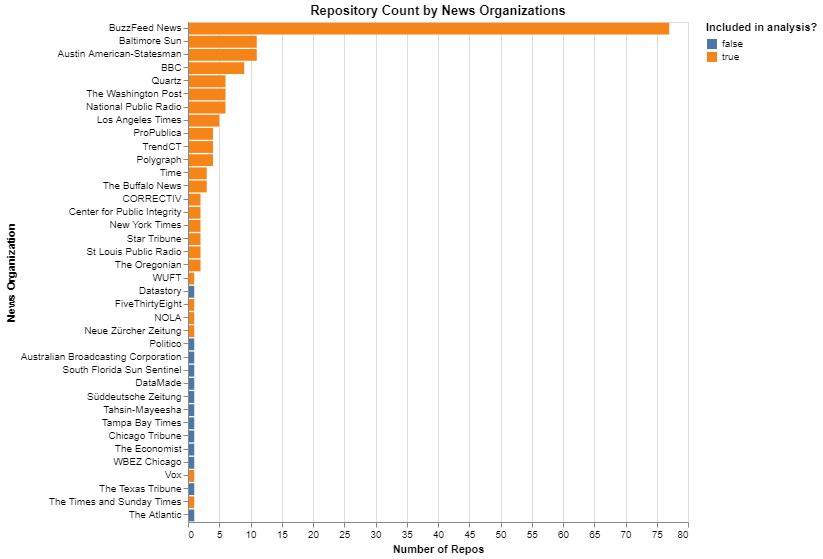

In [13]:
displayCoverage(orgs,
                title = 'Repository Count by News Organizations', 
                metric = 'repo',
                xlab = 'Number of Repos',
                ylab = 'News Organization')

### Top by number of commits

However, one limitation of ranking news organizations by repo count is that some organizations, such as *FiveThirtyEight* keep computational notebooks for multiple data journalism articles in one repo.

A *commit* in Git can be thought of as a unit of change for a repo. Thus the more a repo has changed overtime, the more commits. If a news organization is only using one repo for all their data journalism work, then it should have lots of commits.

This analysis includes the top 18 organizations by commit count.

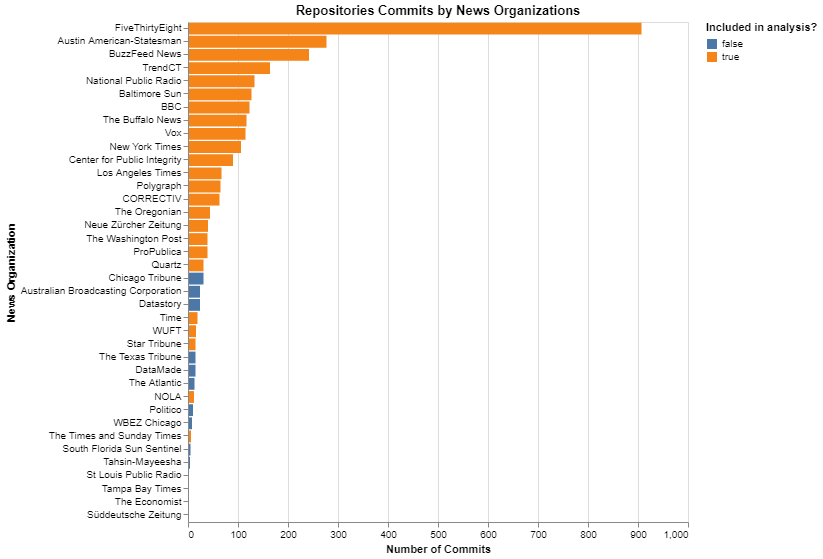

In [14]:
displayCoverage(orgs,
                title = 'Repositories Commits by News Organizations', 
                metric = 'commit',
                xlab = 'Number of Commits',
                ylab = 'News Organization')

### Which organizations were included?

In [15]:
included_count = sum(orgs.is_included)
total_orgs = len(orgs.name.unique())

displayMarkdown("""
This analysis includes {included_count} news organizations out of {total} that had computational notebooks deemed relevant to this analysis ({percent}%).
""".format(**{
    'included_count': included_count,
    'total': total_orgs,
    'percent': round((included_count / total_orgs) * 100, 2),
}))

displayMarkdown("""
| Organization | Is included? |
| ------------ | ------------ |
{rows}
""".format(**{
    'rows': '\n '.join([ '| {} | {} |'.format(row[0], '✔️' if row[5] else '❌') for i, row in orgs.sort_values('name').iterrows() ])
}))


This analysis includes 25 news organizations out of 38 that had computational notebooks deemed relevant to this analysis (65.79%).



| Organization | Is included? |
| ------------ | ------------ |
| Austin American-Statesman | ✔️ |
 | Australian Broadcasting Corporation | ❌ |
 | BBC | ✔️ |
 | Baltimore Sun | ✔️ |
 | BuzzFeed News | ✔️ |
 | CORRECTIV | ✔️ |
 | Center for Public Integrity | ✔️ |
 | Chicago Tribune | ❌ |
 | DataMade | ❌ |
 | Datastory | ❌ |
 | FiveThirtyEight | ✔️ |
 | Los Angeles Times | ✔️ |
 | NOLA | ✔️ |
 | National Public Radio | ✔️ |
 | Neue Zürcher Zeitung | ✔️ |
 | New York Times | ✔️ |
 | Politico | ❌ |
 | Polygraph | ✔️ |
 | ProPublica | ✔️ |
 | Quartz | ✔️ |
 | South Florida Sun Sentinel | ❌ |
 | St Louis Public Radio | ✔️ |
 | Star Tribune | ✔️ |
 | Süddeutsche Zeitung | ❌ |
 | Tahsin-Mayeesha | ❌ |
 | Tampa Bay Times | ❌ |
 | The Atlantic | ❌ |
 | The Buffalo News | ✔️ |
 | The Economist | ❌ |
 | The Oregonian | ✔️ |
 | The Texas Tribune | ❌ |
 | The Times and Sunday Times | ✔️ |
 | The Washington Post | ✔️ |
 | Time | ✔️ |
 | TrendCT | ✔️ |
 | Vox | ✔️ |
 | WBEZ Chicago | ❌ |
 | WUFT | ✔️ |


## Including the top-n data journalists

The first step is to split (a.k.a explode) rows in the `citations` data frame that represent collaborative data journalism projects done by multiple journalists into separate rows. I've separated multiple authors in the citations with semicolons. It's important to split the name on semicolon and space when defining `citationsUnpacked` to prevent duplicates.

In [16]:
citations[citations.journalist.str.contains(';')]

,journalist,year,month,date,analysis,organization,path
0,"Aisch, Gregor; Keller, Josh; Eddelbuettel, Dirk",2016,June,13,Analysis of NICS gun purchase background checks.,New YorkTimes,gunsales
21,"Keller, Josh; Pearce, Adam",2016,September,7,US State prison admissions by county.,New York Times,prison-admissions
27,"Menezes, Ryan; Stevens, Matt; Welsh, Ben",2016,October,31,"California ""Conservation-Consumption Score"" an...",Los Angeles Times,california-ccscore-analysis


In [17]:
citationsUnpacked = pd.DataFrame(list(citations.journalist.apply(lambda name: name.split('; '))),
            index=citations.path).stack().to_frame().reset_index([0, 'path']) \
    .rename(columns={0: 'journalist'})

citationJournalists = pd.merge(citationsUnpacked, citations.drop(['journalist'], axis=1), on='path', how='left')
citationJournalists['name'] = citationJournalists.journalist.apply(lambda name: "{} {}".format(*name.split(', ')[::-1]))
citationJournalists['is_cited'] = True
citationJournalists = citationJournalists[['name', 'is_cited']].drop_duplicates()
citationJournalists.head()

,name,is_cited
0,Gregor Aisch,True
1,Josh Keller,True
2,Dirk Eddelbuettel,True
3,Peter Aldhous,True
4,Rob Arthur,True


Modify the `citations` data frame so that it has a primary key to join the `contributors` data frame. The `journalist` column in `citations` is formatted as "given name, surname", so I'll swap those around.

From the `contributors` data frame, we can get a sense of the "top" data journalists based on how many commits they've made and the number of followers of their GitHub user account.

In [18]:
# Fun fact, this is an example of aggregate join
dataJournalists = pd.merge(
    contributors[['login', 'name']],
    contributors.groupby('login').agg({'followers': max, 'commits': sum }).reset_index(),
    on='login') \
    .drop_duplicates()

createPk = lambda df: df.name.str.lower().str.replace(r'\s', '')

dataJournalists['pk'] = createPk(dataJournalists)
citationJournalists['pk'] = createPk(citationJournalists)

# Combine to get a data frame of journalists included and not included in analysis
dataJournalists = pd.merge(dataJournalists, citationJournalists, how='left', on='pk') \
    .rename(columns={
        'is_cited': 'is_included',
        'followers': 'follower_count',
        'commits': 'commit_count',
        'name_x': 'name'
    }) \
    .drop(['name_y', 'pk'], axis=1)

dataJournalists.is_included.fillna(False, inplace=True)

# # Rank data journalists by followers and commits
rank(dataJournalists, 'follower_count', 'follower_rank')
rank(dataJournalists, 'commit_count', 'commit_rank')

# # Remove NAs
dataJournalists.dropna(inplace=True)

# Remove duplicates 
dataJournalists.drop_duplicates('login', inplace=True)

dataJournalists.head()

,login,name,follower_count,commit_count,is_included,follower_rank,commit_rank
77,dmil,Dhrumil Mehta,266,419,False,16,1
22,andrewbtran,Andrew Tran,99,159,True,30,2
9,jsvine,Jeremy Singer-Vine,562,126,True,5,3
115,lexieheinle,Lexie Heinle,10,114,True,100,4
78,andrewflowers,Andrew Flowers,309,114,True,13,5


### Sanity check

Did we loose any journalists from the citations list when we merged it with the list of data journalists?

In [24]:
displayMarkdown(', '.join(list(set(citationJournalists.name).difference(set(dataJournalists.name)))))

Walter Hickey, Stefano Ceccon, Rob Arthur, Matt Stevens, Soo Oh, Adam Pearce, Sahil Chinoy

Journalists who worked collaboratively and only one of them committed code.
* Matt Stevens
* Adam Pearce

Journalists who did Observable notebooks
* Sahil Chinoy

Journalists who did not commit their own code. Lots of FiveThirtyEight code appears to be committed by someone else.
* Rob Arthur
* Stefano Ceccon
* Walt Hickey

### Top data journalists by commits

I've excluded some data journalist with many commits from this analysis:

* **Dhrumil Mehta**: [The commit history of Dhrumil Mehta](https://github.com/fivethirtyeight/data/commits?author=dmil), a Database journalist at *FiveThirtyEight*, is mostly adding CSV files, updating READmes, and other forms of repo maintenance. It was not immediately apparent if he perform analysis or data wrangling on the data-journalism articles checked into the repo.

* **Derek Willis**: According to the [BuzzFeedNews/2014-09-rising-sunday-show-guests commit history](https://github.com/BuzzFeedNews/2014-09-rising-sunday-show-guests/commit/780b808606d05a7d79dc6c40e5c64d03a490fe65), Derek Willis is only included in this analysis because he made the initial commit for this repo.

* **Stephen Turner**: Like many contributors to *FiveThirtyEight*'s data repo, Stephen Turner [only cleaned up two issues with the repo](https://github.com/fivethirtyeight/data/commits?author=stephenturner).

* **Dan Nguyen**: His contributions to The Upshot's LEO senate model [only include updating the README file](https://github.com/TheUpshot/leo-senate-model/commits?author=dannguyen).

This analysis includes the top 8 people by commit count.

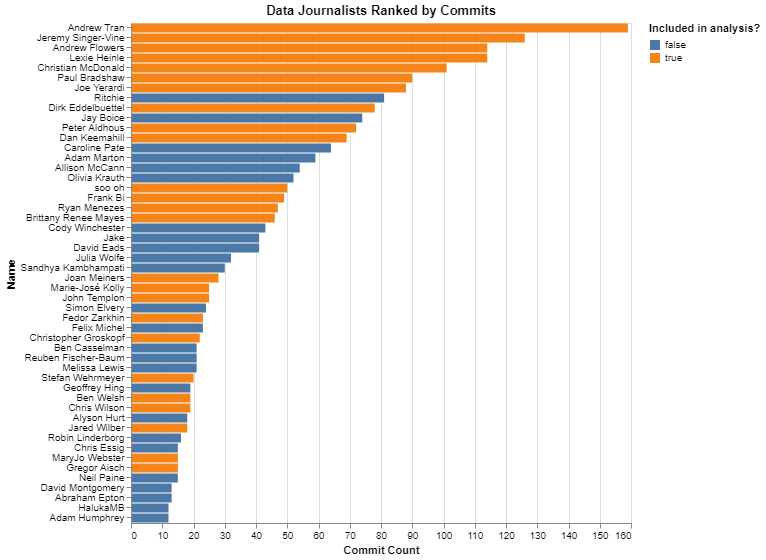

In [20]:
blacklist = ['Dhrumil Mehta', 'Derek Willis', 'Stephen Turner', 'Dan Nguyen']

displayCoverage(
    df = dataJournalists[~dataJournalists.name.isin(blacklist)],
    title = 'Data Journalists Ranked by Commits',
    metric = 'commit',
    xlab = 'Commit Count',
    ylab = 'Name',
    ykind = 'people'
)

### Top data journalists by followers

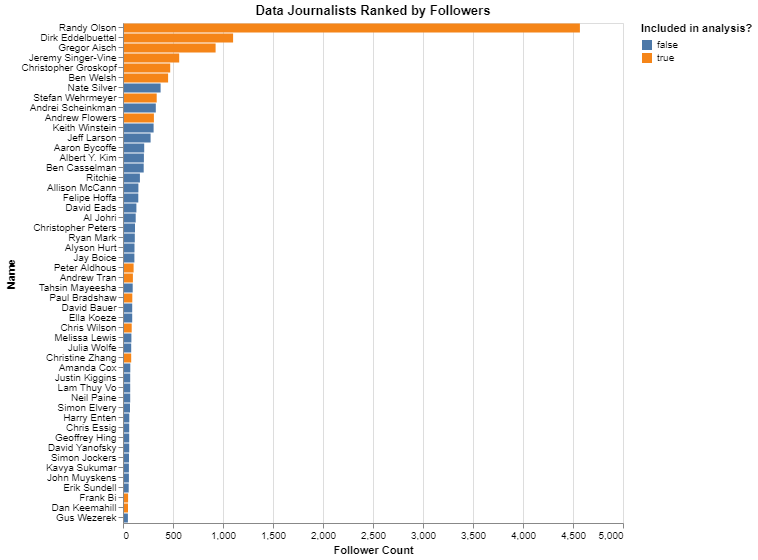

This analysis includes the top 9 people by follower count.

In [22]:
displayCoverage(
    df = dataJournalists[~dataJournalists.name.isin(blacklist)],
    title = 'Data Journalists Ranked by Followers',
    metric = 'follower',
    xlab = 'Follower Count',
    ylab = 'Name',
    ykind = 'people'
)